In [49]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
db1 = pd.read_csv("/Users/Shiva/Desktop/python/Projects/project4-Ensemble/TelcomCustomer-Churn_1.csv")
db2 = pd.read_csv("/Users/Shiva/Desktop/python/Projects/project4-Ensemble/TelcomCustomer-Churn2.csv")

In [3]:
db1.shape

(7043, 10)

In [4]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [5]:
db2.shape

(7043, 11)

In [6]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OnlineBackup      7043 non-null   object 
 1   DeviceProtection  7043 non-null   object 
 2   TechSupport       7043 non-null   object 
 3   StreamingTV       7043 non-null   object 
 4   StreamingMovies   7043 non-null   object 
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   PaymentMethod     7043 non-null   object 
 8   MonthlyCharges    7043 non-null   float64
 9   TotalCharges      7043 non-null   object 
 10  Churn             7043 non-null   object 
dtypes: float64(1), object(10)
memory usage: 605.4+ KB


In [7]:
#db = db1.append(db2, ignore_index=True)

db = pd.concat([db1,db2],axis=1)


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
db.shape

(7043, 21)

In [10]:
db.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
#• Missing value treatment

db.isna().sum()

## There are no missing values.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# • Convert categorical attributes to continuous using relevant functional knowledge

from sklearn.preprocessing import LabelEncoder

original = db
mask = db.isnull()

db = db.astype(str).apply(LabelEncoder().fit_transform)
db = db.where(~mask, original)


In [13]:
db

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,446,2505,0
1,3962,1,0,0,0,28,1,0,0,2,...,2,0,0,0,1,0,3,802,1466,0
2,2564,1,0,0,0,12,1,0,0,2,...,0,0,0,0,0,1,3,740,157,1
3,5535,1,0,0,0,40,0,1,0,2,...,2,2,0,0,1,0,0,570,1400,0
4,6511,0,0,0,0,12,1,0,1,0,...,0,0,0,0,0,1,2,1033,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,17,1,2,0,2,...,2,2,2,2,1,1,3,1295,1597,0
7039,1525,0,0,1,1,70,1,2,1,0,...,2,0,2,2,1,1,1,59,5698,0
7040,3367,0,0,1,1,3,0,1,0,2,...,0,0,0,0,0,1,2,441,2994,0
7041,5934,1,1,1,0,34,1,2,1,0,...,0,0,0,0,0,1,3,1099,2660,1


In [14]:
#• Drop attribute/s if required using relevant functional knowledge

db = db.drop(['customerID', 'PaperlessBilling'], axis =1) 

In [15]:
db

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,2,446,2505,0
1,1,0,0,0,28,1,0,0,2,0,2,0,0,0,1,3,802,1466,0
2,1,0,0,0,12,1,0,0,2,2,0,0,0,0,0,3,740,157,1
3,1,0,0,0,40,0,1,0,2,0,2,2,0,0,1,0,570,1400,0
4,0,0,0,0,12,1,0,1,0,0,0,0,0,0,0,2,1033,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,17,1,2,0,2,0,2,2,2,2,1,3,1295,1597,0
7039,0,0,1,1,70,1,2,1,0,2,2,0,2,2,1,1,59,5698,0
7040,0,0,1,1,3,0,1,0,2,0,0,0,0,0,0,2,441,2994,0
7041,1,1,1,0,34,1,2,1,0,0,0,0,0,0,0,3,1099,2660,1


<AxesSubplot:>

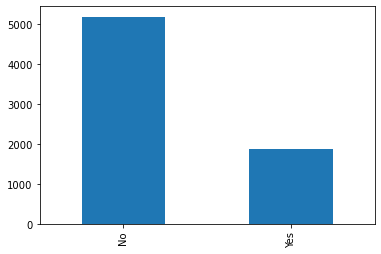

In [16]:
#• Perform detailed statistical analysis on the data.

db2['Churn'].value_counts().plot(kind='bar')

## The churn person are significantly high.  They are almost 40% in total.  


<AxesSubplot:>

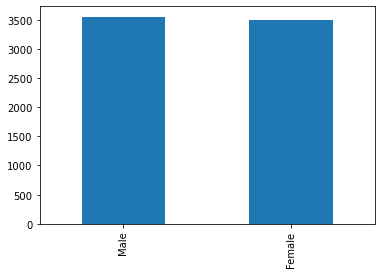

In [17]:
db1['gender'].value_counts().plot(kind='bar')

## Both the gender are equally using the service, so no bias in there.

<AxesSubplot:>

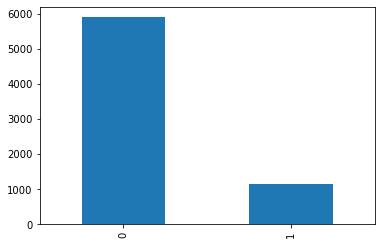

In [18]:
db1['SeniorCitizen'].value_counts().plot(kind='bar')

## Very small percentage of senior citizens are using this service provider.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

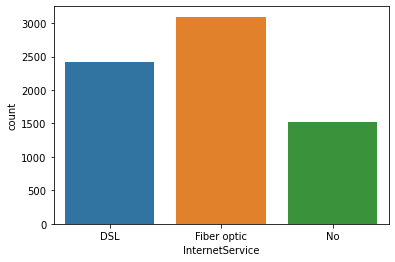

In [50]:
#• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.


sns.countplot(db1['InternetService'])

## More people are using Fiber optic and DSL internet connection.  
## still there are some considerate amount of people who dont use internet connection.

In [20]:
data_crosstab = pd.crosstab(db1['InternetService'], db['gender'], margins = True)
data_crosstab

## There is no significant gender difference in using the internet connection.
## Almost the same amount of male and female uses the internet connections.

gender,0,1,All
InternetService,,,
DSL,1188,1233,2421
Fiber optic,1553,1543,3096
No,747,779,1526
All,3488,3555,7043


<AxesSubplot:>

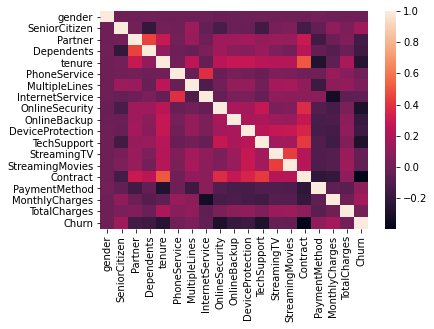

In [21]:
sns.heatmap(db.corr())

## The more darker heatmap is not good.  It says there are more dependencies between the independent variables.

In [22]:
 # sns.pairplot(db)

## the two datasets are totally not related. 
## only if you have any common columns we could be able to pair up and see the data clearly.
## This pairplot shows separate relationship for the first dataset and separate relationship for the second one.

In [23]:
## 4. Data pre-processing:

## • Segregate predictors vs target attributes

## adding the featue variables to X apart from the dependent variable

from sklearn.model_selection import train_test_split

X = db.drop(['Churn'], axis = 1)

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,2,446,2505
1,1,0,0,0,28,1,0,0,2,0,2,0,0,0,1,3,802,1466
2,1,0,0,0,12,1,0,0,2,2,0,0,0,0,0,3,740,157
3,1,0,0,0,40,0,1,0,2,0,2,2,0,0,1,0,570,1400
4,0,0,0,0,12,1,0,1,0,0,0,0,0,0,0,2,1033,925


In [24]:
## adding the dependent variable to Y 

y = db['Churn']

y.head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [25]:
## • Perform train-test split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [26]:
X_train.shape, y_train.shape

((4930, 18), (4930,))

In [27]:
X_test.shape, y_test.shape

((2113, 18), (2113,))

In [28]:
## • Check for target balancing and fix it if found imbalanced.
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [29]:
y_train.value_counts()

0    3635
1    1295
Name: Churn, dtype: int64

In [30]:
## To balance the data, I am trying to install a new package, so I can smote it.

!pip install imblearn  


In [31]:

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_ba, y_train_ba = smote.fit_resample(X_train, y_train)

In [32]:
y_train_ba.value_counts()
##  The data is balanced now, so we can proceed with further modeling

1    3635
0    3635
Name: Churn, dtype: int64

<AxesSubplot:>

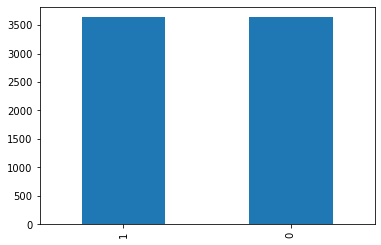

In [33]:
## • Check if the train and test data have similar statistical characteristics when compared with original data.
y_train_ba.value_counts().plot(kind='bar')


In [34]:
X_test.shape, y_test.shape

((2113, 18), (2113,))

In [35]:
###  Model training, testing and tuning:

## • Train and test all ensemble models taught in the learning module.


## Creating a method with an input of the train and test data and an output of model accuracies.  
## So I can use the same method for all the model to deliver the outputs.

      
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def fit_n_print(model,X_train, y_train, X_test, y_test):
  
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    
    print("Training Accuracy : ", model.score(X_train, y_train))
    print("Test Accuracy : ", model.score(X_test, y_test))
    
    print("#" * 50)
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))



In [36]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

fit_n_print(lr,X_train_ba,y_train_ba, X_test, y_test)

Training Accuracy :  0.7737276478679505
Test Accuracy :  0.7349739706578324
##################################################
[[1129  410]
 [ 150  424]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1539
           1       0.51      0.74      0.60       574

    accuracy                           0.73      2113
   macro avg       0.70      0.74      0.70      2113
weighted avg       0.78      0.73      0.75      2113



In [37]:
### KNN

from sklearn.neighbors import KNeighborsClassifier


for i in range(2,9,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    
    fit_n_print(knn,X_train_ba,y_train_ba, X_test, y_test)
    
    

Training Accuracy :  0.9063273727647868
Test Accuracy :  0.7169900615238997
##################################################
[[1292  247]
 [ 351  223]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1539
           1       0.47      0.39      0.43       574

    accuracy                           0.72      2113
   macro avg       0.63      0.61      0.62      2113
weighted avg       0.70      0.72      0.71      2113

Training Accuracy :  0.8485557083906465
Test Accuracy :  0.7046852815901562
##################################################
[[1207  332]
 [ 292  282]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1539
           1       0.46      0.49      0.47       574

    accuracy                           0.70      2113
   macro avg       0.63      0.64      0.63      2113
weighted avg       0.71      0.70      0.71      2113

Training Accuracy :  0.818569463548830

In [38]:
### RandomForest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight = 'balanced' , n_estimators = 100)

fit_n_print(rfc,X_train_ba,y_train_ba, X_test,y_test)

Training Accuracy :  0.9972489683631361
Test Accuracy :  0.7614765735920492
##################################################
[[1310  229]
 [ 275  299]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1539
           1       0.57      0.52      0.54       574

    accuracy                           0.76      2113
   macro avg       0.70      0.69      0.69      2113
weighted avg       0.76      0.76      0.76      2113



In [39]:
## Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 200)

fit_n_print(gbc,X_train_ba,y_train_ba, X_test,y_test)

Training Accuracy :  0.8570839064649244
Test Accuracy :  0.7671557027922385
##################################################
[[1245  294]
 [ 198  376]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1539
           1       0.56      0.66      0.60       574

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.77      0.77      2113



In [40]:
### AdaBoosting

from sklearn.ensemble import AdaBoostClassifier

adc = GradientBoostingClassifier(n_estimators = 100)

fit_n_print(adc,X_train_ba,y_train_ba, X_test,y_test)

Training Accuracy :  0.8389270976616231
Test Accuracy :  0.7666824420255561
##################################################
[[1221  318]
 [ 175  399]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1539
           1       0.56      0.70      0.62       574

    accuracy                           0.77      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.79      0.77      0.77      2113



In [51]:
## Stacking
## • Select the final best trained model along with your detailed comments for selecting this model.

from sklearn.ensemble import StackingClassifier

estimators = [('lr',lr ), ('rfc',rfc ), ('gbc',gbc ), ('adc',adc )]

clf = StackingClassifier(estimators = estimators, final_estimator = rfc)

fit_n_print(clf,X_train_ba,y_train_ba, X_test,y_test)

Training Accuracy :  0.9387895460797799
Test Accuracy :  0.7624230951254141
##################################################
[[1326  213]
 [ 289  285]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1539
           1       0.57      0.50      0.53       574

    accuracy                           0.76      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.75      0.76      0.76      2113



In [42]:
## • Apply all the possible tuning techniques to train the best model for the given data.

## Out of portion question, yet to learn hyper tuning

LR: 0.760798 (0.063588)
KNN: 0.726685 (0.050723)
rfc: 0.841541 (0.085430)
gbc: 0.816644 (0.081244)
adc: 0.816644 (0.081244)


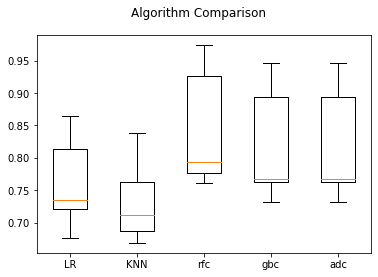

In [52]:
### • Display and compare all the models designed with their train and test accuracies.
### Using 10-fold cross validation

from sklearn import model_selection


models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('rfc', RandomForestClassifier()))
models.append(('gbc', GradientBoostingClassifier()))
models.append(('adc', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_ba, y_train_ba, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [44]:
### • Select the final best trained model along with your detailed comments for selecting this model.

## Random Forest Classifier model seems to have more accuracy.  It has predicted true negative with 83% accuracy.  
## It has very low false negative accuracy rate too.  I guess this model and Gradient Boosting Classifier, both the models are giving better 
## accuracies.  



In [45]:
## • Pickle the selected model for future use.
## Using the pickle module to save the model

import pickle

saved_model = pickle.dumps(rfc)


## Load the pickled model
## rfc_from_pickle = pickle.loads(saved_model)
 
## Use the loaded pickled model to make predictions
## rfc_from_pickle.predict(X_test)

In [46]:
## 6. Conclusion and improvisation:

## • Write your conclusion on the results.

## Random Forest Classifier model seems to have better accuracy.  But I would suggest to use the Ensemble method and get the voting or average 
## result of all the models which can be used here.  All the models are somewhat giving more than 50% of False Negative and False Positives, which 
## is not good to have.  


In [47]:
## • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the
## telecom operator to perform a better data analysis in future.

## These datasets should have a common column like a customer id or something, its always best to combine two datasets based on some common 
## variables.  And it would be really great to have atleast 2 to 3 datasets with more detailed data.  
